In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/social-media-mental-health-indicators-dataset/mental_health_social_media_dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/social-media-mental-health-indicators-dataset/mental_health_social_media_dataset.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Une fois votre Google Drive monté, vous pouvez accéder à vos fichiers en utilisant le chemin `/content/drive/MyDrive/`. Par exemple, si votre fichier `mental_health_social_media_dataset.csv` est dans le dossier racine de votre Drive, le chemin serait le suivant :

In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SOCIAL MEDIA/mental_health_social_media_dataset.csv')
display(df.head())

,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed


In [5]:
df.head()

,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed


In [6]:
df.describe()

,age,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,29.947800,373.058200,175.331600,0.864200,1.835400,7.134660,22.693400,2.510400,7.107600,5.625800
std,12.279936,106.003916,71.209329,0.555176,0.943443,0.533184,10.602862,0.794996,1.062378,0.759928
min,13.000000,140.000000,35.000000,0.000000,0.000000,6.400000,8.000000,1.000000,5.000000,4.000000
25%,21.000000,310.000000,118.000000,1.000000,1.000000,6.700000,14.000000,2.000000,6.000000,5.000000
50%,27.000000,388.000000,170.000000,1.000000,2.000000,7.100000,21.000000,3.000000,7.000000,6.000000
75%,35.250000,461.000000,231.000000,1.000000,2.000000,7.450000,29.000000,3.000000,8.000000,6.000000
max,69.000000,520.000000,338.000000,2.000000,4.000000,8.300000,46.000000,4.000000,9.000000,7.000000


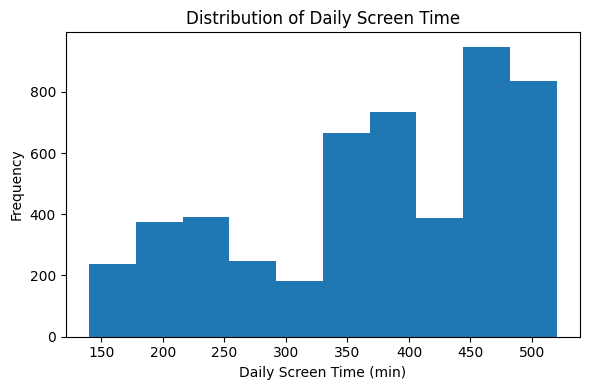

In [7]:
plt.figure(figsize=(6,4))
plt.hist(df['daily_screen_time_min'].dropna())
plt.xlabel('Daily Screen Time (min)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Screen Time')
plt.tight_layout()
plt.show()

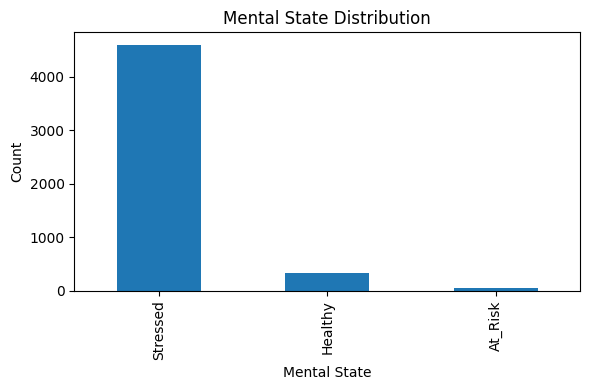

In [8]:
plt.figure(figsize=(6,4))
df['mental_state'].value_counts().plot(kind='bar')
plt.xlabel('Mental State')
plt.ylabel('Count')
plt.title('Mental State Distribution')
plt.tight_layout()
plt.show()

In [9]:
df_clean = df.copy()
df_clean = df_clean.drop(['person_name', 'date'], axis=1)

In [10]:
le_gender = LabelEncoder()
df_clean['gender'] = le_gender.fit_transform(df_clean['gender'])

In [11]:
le_platform = LabelEncoder()
df_clean['platform'] = le_platform.fit_transform(df_clean['platform'])

In [12]:
le_target = LabelEncoder()
df_clean['mental_state'] = le_target.fit_transform(df_clean['mental_state'])

In [13]:
X = df_clean.drop('mental_state', axis=1)
y = df_clean['mental_state']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [17]:
print("Model Accuracy:", accuracy)

Model Accuracy: 1.0


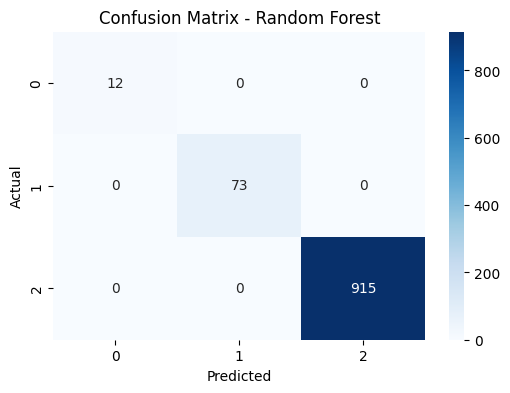

In [18]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00       915

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [20]:
importances = model.feature_importances_
feature_names = X.columns

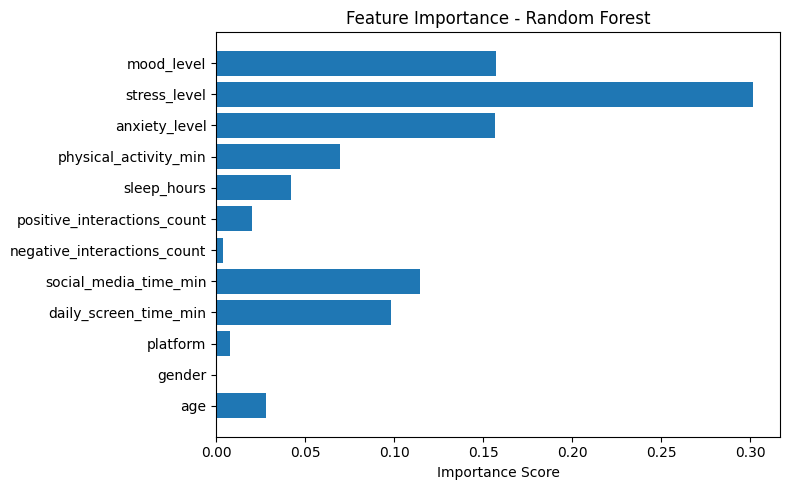

In [21]:
plt.figure(figsize=(8,5))
plt.barh(feature_names, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()

Si votre fichier se trouve dans un sous-dossier, par exemple un dossier nommé 'datasets', le chemin serait : `/content/drive/MyDrive/datasets/mental_health_social_media_dataset.csv`.